In [1]:
# Required Libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn.cluster import KMeans                   # K-Means Clustering
from sklearn.neighbors import KNeighborsClassifier    # KNN Classification
from sklearn import metrics                          # Prediction Accuracy
from sklearn.decomposition import PCA                # Principle component Analysis
from sklearn.model_selection import KFold            # KFold validation
import matplotlib.pyplot as plt

In [2]:
# Read dataset and split into train and test
X_raw = pd.read_csv("Iris.csv") #Read dataset
X_raw = X_raw.drop('Id', axis=1) #drop id column (unnesecceray features)
y_raw = X_raw['Species'] 
X_raw = X_raw.drop('Species', axis=1) #drop label column for clustering

In [3]:
# Reduce the dimension of the dataset to 2
pca = PCA(n_components=2)
reduced_train = pca.fit_transform(X_raw)

In [4]:
# Implement KMeans and KNN
f = 2
kfold = KFold(n_splits=f, shuffle=True, random_state=0)    # KFold Model : Splitting 2 fold test and train data
kmeans = KMeans(n_clusters=3, random_state=0)   # KMeans Model : number of centroids :3
knn = KNeighborsClassifier(n_neighbors=6)        # KNN Model : number of neighbors :6

# Saving train and test datasets to use again for plots.
test_sets = [] 
kmeans_preds = []
knn_preds = []

for train_index , test_index in kfold.split(reduced_train):
    X_train , X_test = reduced_train[train_index,:],reduced_train[test_index,:]
    y_train , y_test = y_raw[train_index] , y_raw[test_index]
    test_sets.append((X_test, y_test))

    kmeans.fit(X_train)
    kmeans_preds.append(kmeans.predict(X_test))

    knn.fit(X_train, y_train)
    knn_preds.append(knn.predict(X_test))

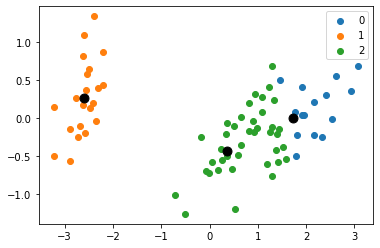

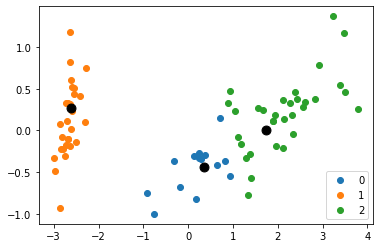

In [5]:
#Plot KMeans Distribution
for i in range(f):
    (X_test, y_test) = test_sets[i] # Taken saved test data fold(i)
    yup = kmeans_preds[i]           # Taken saved prediction results
    label_names = np.unique(yup)             # Get unique label names
    centroids = kmeans.cluster_centers_      # Get cluster centers from the model
    for j in label_names:                    # Plot distribution
        plt.scatter(X_test[yup == j , 0] , X_test[yup == j , 1] , label = j)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    plt.legend()
    plt.show()

KNN Accuracy: 0.92


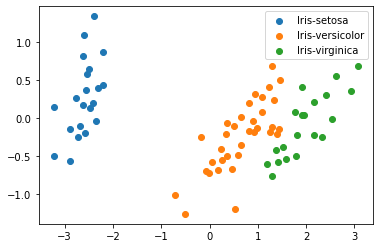

KNN Accuracy: 0.9733333333333334


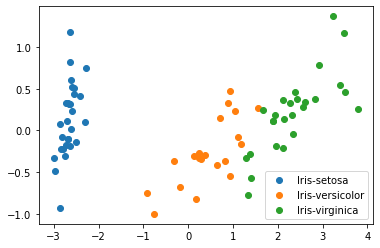

In [6]:
# Plot KNN Distribution
for i in range(f):
    ysp = knn_preds[i]  # Taken saved prediction results
    (X_test, y_test) = test_sets[i] # Taken saved test data fold(i)
    label_names = np.unique(ysp)             # Get unique label names
    print("KNN Accuracy:",sklearn.metrics.accuracy_score(y_test, ysp))
    for j in label_names:                    # Plot distribution
        plt.scatter(X_test[ysp == j , 0] , X_test[ysp == j , 1] , label = j)
    plt.legend()
    plt.show()
